In [13]:
import os
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader


from activation.acts import get_activations,SCiU
from util.utils import vis_activations
from data.datasets import MNIST,CIFAR10
from model.models import *
from experiment import Trainer,ModelCard

In [4]:
# ./activation/acts.py
acts = get_activations(return_type='dict')
acts.update({
    'SCiU_square':SCiU(pos_multiplier=1,
                        neg_multiplier=1,
                        clip_max=1,
                        clip_min=-1),
    'SCiU_squarev2':SCiU(pos_multiplier=2,
                        neg_multiplier=2,
                        clip_max=1,
                        clip_min=-1),           
})
acts

{'GELU': GELU(approximate='none'),
 'SoftModulusQ': SoftModulusQ(),
 'Modulus': Modulus(),
 'BipolarSigmoid': BipolarSigmoid(),
 'TanhExp': TanhExp(),
 'SCiU': SCiU(),
 'SCiU_square': SCiU(),
 'SCiU_squarev2': SCiU()}

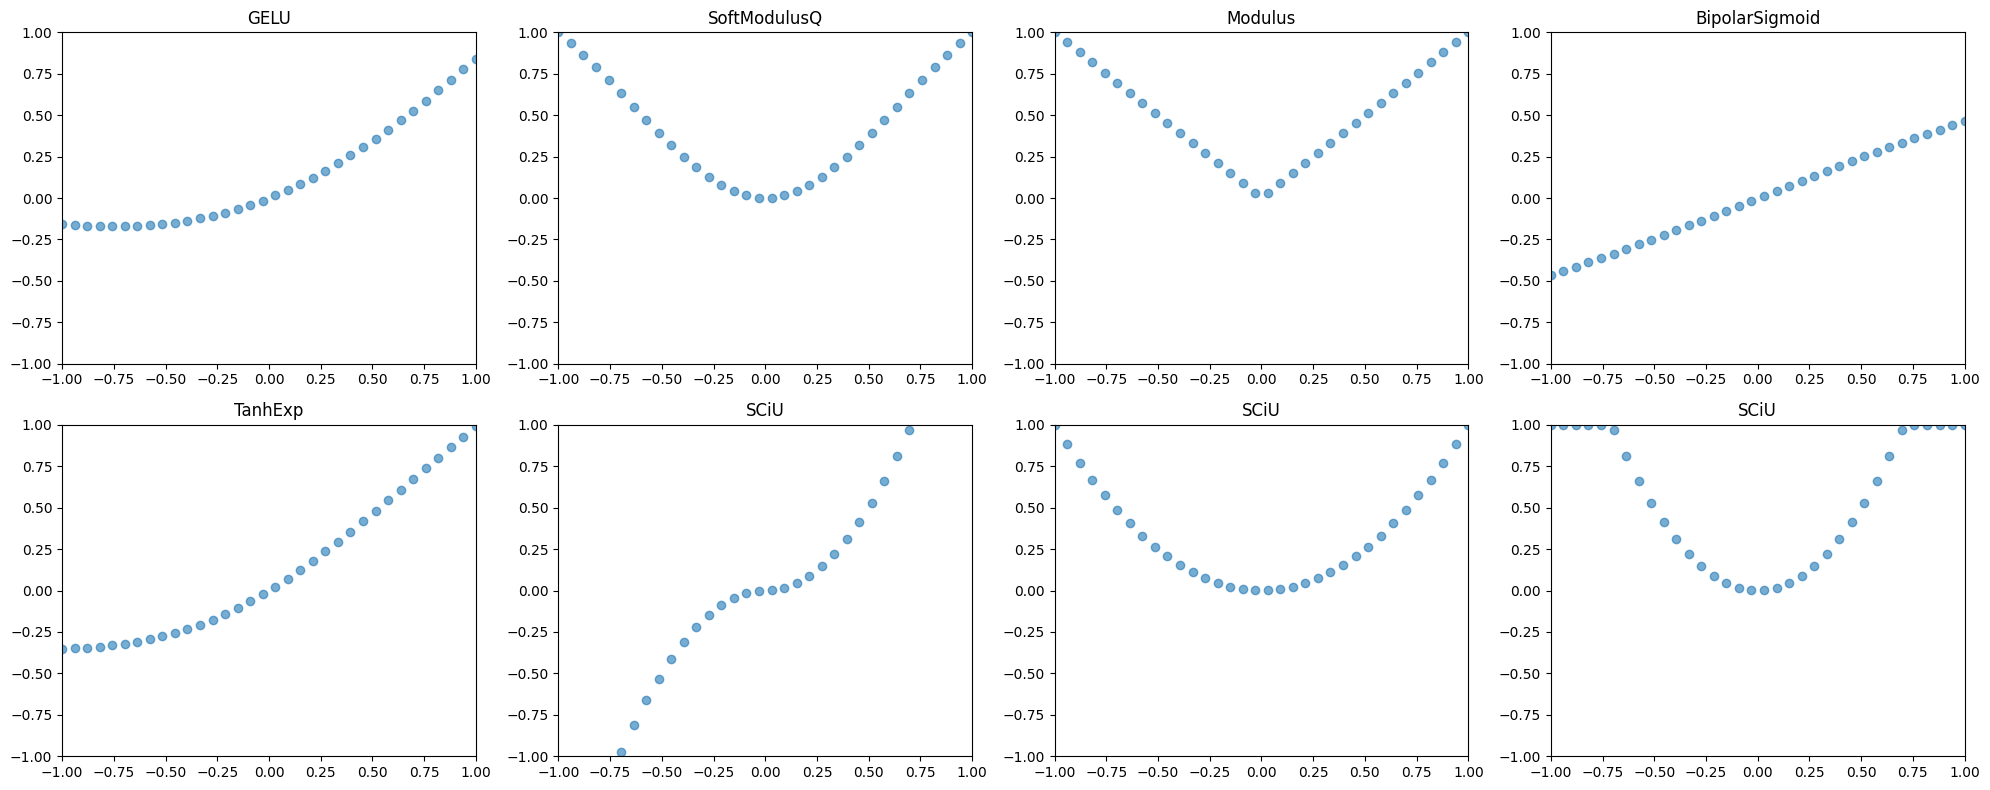

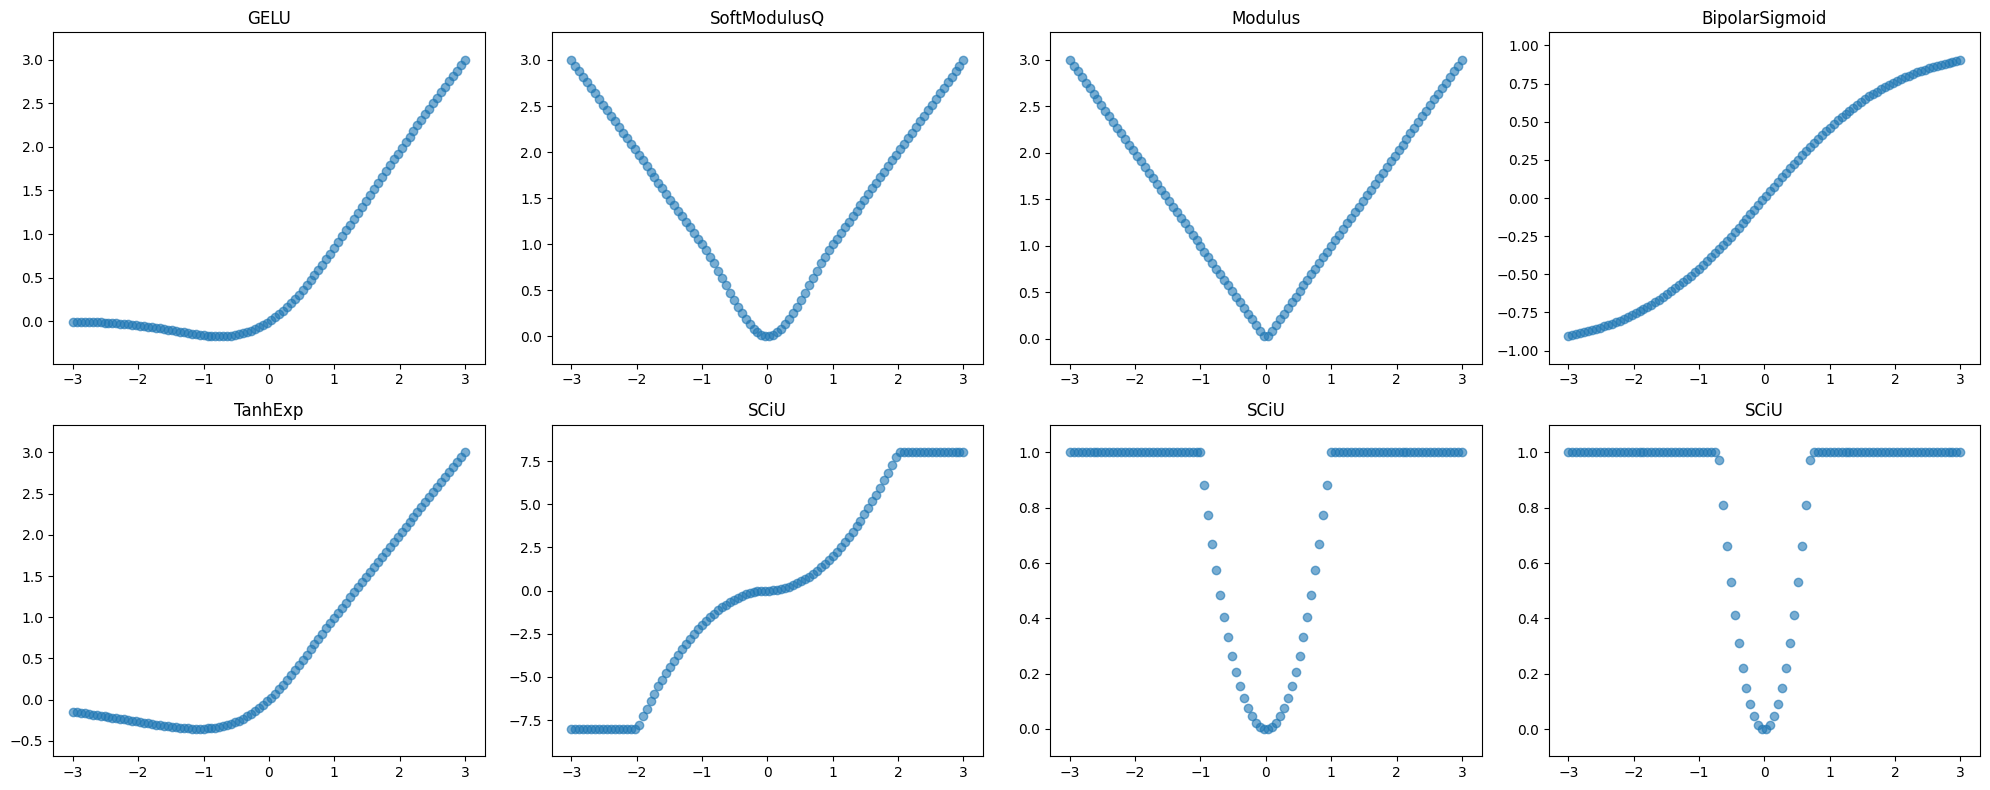

In [7]:
# visualize activation functions
x = torch.linspace(-3, 3, 100)

vis_activations(acts.values(), x, cols=4,xlim=[-1,1],ylim=[-1,1])
vis_activations(acts.values(), x, cols=4)


### Global Config

In [8]:
#
num_epochs = 20
learning_rate = 0.001
criterion=nn.CrossEntropyLoss()
optimizer=optim.AdamW
optimizer_kwargs= {'lr':learning_rate}
#
experiments_dir='./results'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


### MNIST
- class :  0~9 
- shape : (1, 28, 28)
- train : 60,000 samples
- test : 10,000 samples
- transform : toTensor()

In [9]:
train_dataset = MNIST(train=True)
test_dataset = MNIST(train=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=2048, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=2048, shuffle=False)

{'input_size': 784, 'hidden_size': 128, 'num_classes': 10}
{'input_size': 784, 'hidden_size': 128, 'num_classes': 10, 'activation': GELU(approximate='none')}
Training with GELU activation function...
Epoch [1/20], Test Loss: 0.5459, Test Accuracy: 84.41%
Epoch [2/20], Test Loss: 0.3247, Test Accuracy: 90.62%
Epoch [3/20], Test Loss: 0.2769, Test Accuracy: 91.87%
Epoch [4/20], Test Loss: 0.2585, Test Accuracy: 92.66%
Epoch [5/20], Test Loss: 0.2302, Test Accuracy: 93.45%
Epoch [6/20], Test Loss: 0.2109, Test Accuracy: 93.91%
Epoch [7/20], Test Loss: 0.1979, Test Accuracy: 94.24%
Epoch [8/20], Test Loss: 0.1827, Test Accuracy: 94.58%
Epoch [9/20], Test Loss: 0.1695, Test Accuracy: 94.90%
Epoch [10/20], Test Loss: 0.1619, Test Accuracy: 95.17%
Epoch [11/20], Test Loss: 0.1544, Test Accuracy: 95.28%
Epoch [12/20], Test Loss: 0.1456, Test Accuracy: 95.56%
Epoch [13/20], Test Loss: 0.1370, Test Accuracy: 95.96%
Epoch [14/20], Test Loss: 0.1302, Test Accuracy: 95.94%
Epoch [15/20], Test Loss:

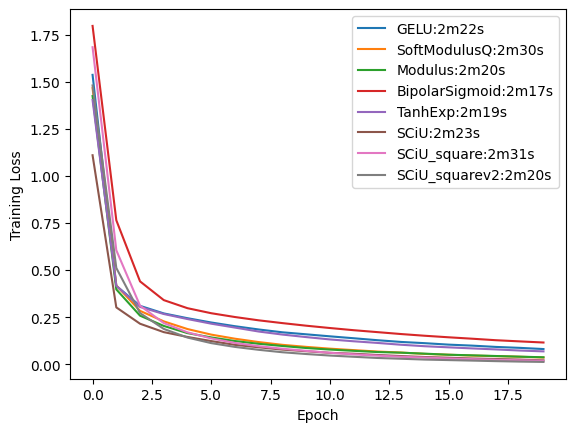

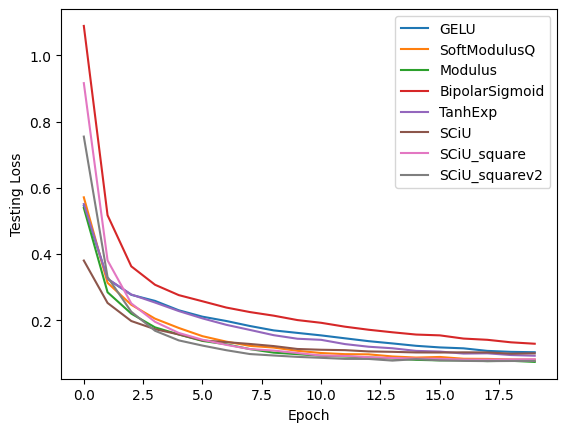

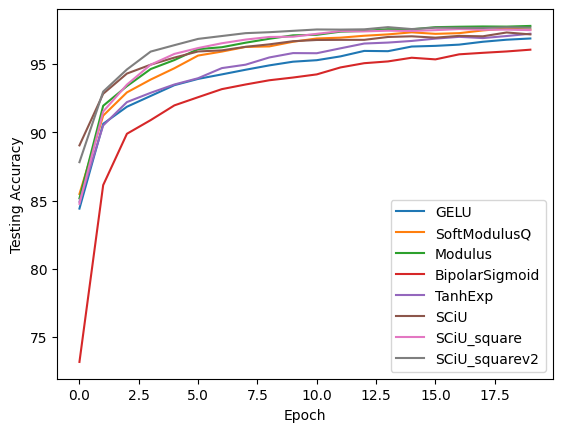

In [10]:
# model : BasicMLP
model_kwargs = {
    'input_size': 784,
    'hidden_size': 128,
    'num_classes': 10
}

model_card = ModelCard(BasicMLP,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir,model_card.name))

{'name': 'resnet18', 'input_size': 28, 'in_channel': 1, 'n_classes': 10}


c:\Users\zxcas\anaconda3\envs\torch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\zxcas\anaconda3\envs\torch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


{'name': 'resnet18', 'input_size': 28, 'in_channel': 1, 'n_classes': 10, 'activation': GELU(approximate='none')}
Training with GELU activation function...
Epoch [1/20], Test Loss: 0.2754, Test Accuracy: 90.97%
Epoch [2/20], Test Loss: 0.0550, Test Accuracy: 98.23%
Epoch [3/20], Test Loss: 0.0520, Test Accuracy: 98.29%
Epoch [4/20], Test Loss: 0.0496, Test Accuracy: 98.65%
Epoch [5/20], Test Loss: 0.0544, Test Accuracy: 98.54%
Epoch [6/20], Test Loss: 0.0541, Test Accuracy: 98.61%
Epoch [7/20], Test Loss: 0.0612, Test Accuracy: 98.53%
Epoch [8/20], Test Loss: 0.0673, Test Accuracy: 98.20%
Epoch [9/20], Test Loss: 0.0477, Test Accuracy: 98.69%
Epoch [10/20], Test Loss: 0.0407, Test Accuracy: 98.92%
Epoch [11/20], Test Loss: 0.0606, Test Accuracy: 98.27%
Epoch [12/20], Test Loss: 0.0525, Test Accuracy: 98.49%
Epoch [13/20], Test Loss: 0.0473, Test Accuracy: 98.69%
Epoch [14/20], Test Loss: 0.0352, Test Accuracy: 99.14%
Epoch [15/20], Test Loss: 0.0367, Test Accuracy: 99.06%
Epoch [16/20],

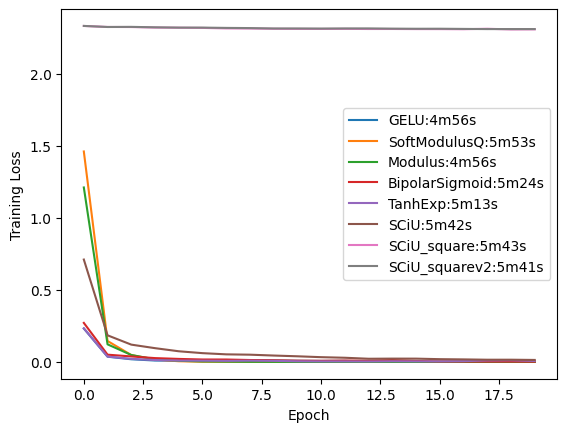

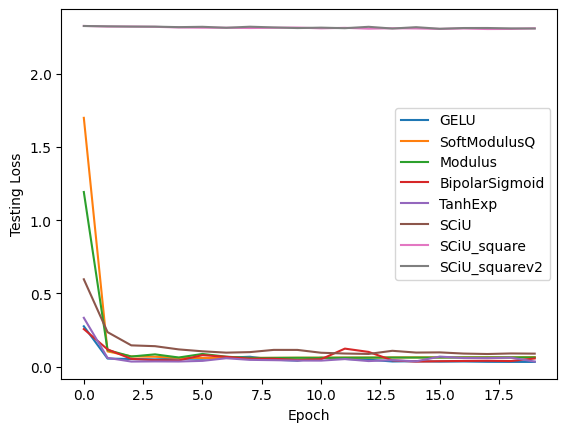

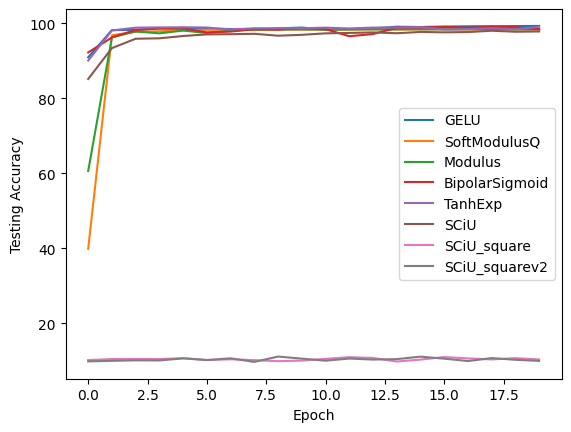

In [12]:
# model : ResNet18
model_kwargs = {
    'name':'resnet18',
    'input_size': 28,
    'in_channel': 1,
    'n_classes': 10,
}

model_card = ModelCard(ResNet,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir,model_card.name))


In [ ]:
# model : ResNet50
model_kwargs = {
    'input_size': 28,
    'in_channel': 1,
    'n_classes': 10,
}

model_card = ModelCard(ResNet('resnet50'),**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir,model_card.name))


### CIFAR10
- class :  0~9 
- shape : (3, 32, 32)
- train : 50,000
- test : 10,000
- transform : toTensor()

In [14]:
train_dataset = CIFAR10(train=True)
test_dataset = CIFAR10(train=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=2048, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=2048, shuffle=False)

In [ ]:
######################### TODO ######################################

In [ ]:
# model : BasicMLP
model_kwargs = {
    'input_size': 784,
    'hidden_size': 128,
    'num_classes': 10
}

model_card = ModelCard(BasicMLP,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir,model_card.name))

In [ ]:
# model : ResNet18
model_kwargs = {
    'input_size': 28,
    'in_channel': 1,
    'n_classes': 10,
}

model_card = ModelCard(ResNet('resnet18'),**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir,model_card.name))
